In [1]:
#import advertisement budget sales data 
import pandas as pd
data = pd.read_excel(r"E:\Suhani\Notes\Data Science\Data\Advertising data.xlsx")
data

,Day,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [2]:
#Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Day                      200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [3]:
#describe the data
data.describe()

,Day,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
#Check for correlation between the variables
data.corr()

,Day,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
Day,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV Ad Budget ($),0.017715,1.000000,0.054809,0.056648,0.782224
Radio Ad Budget ($),-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper Ad Budget ($),-0.154944,0.056648,0.354104,1.000000,0.228299
Sales ($),-0.051616,0.782224,0.576223,0.228299,1.000000


### From the above table it is clear that Sales is more influenced by TV Ad Budget and less influenced by Newspaper Ad Budget.

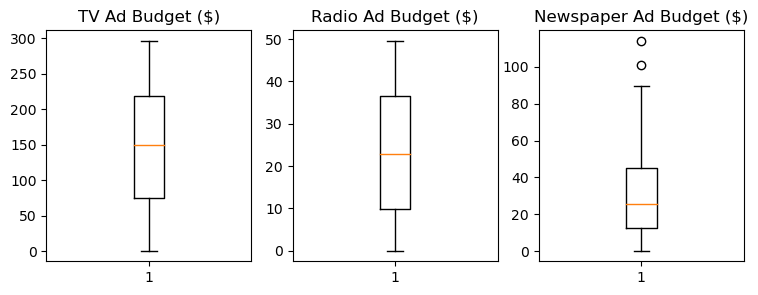

In [7]:
#Check for outliers usin boxplot
import matplotlib.pyplot as plt

plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.boxplot(data["TV Ad Budget ($)"])
plt.title("TV Ad Budget ($)")

plt.subplot(1,3,2)
plt.boxplot(data["Radio Ad Budget ($)"])
plt.title("Radio Ad Budget ($)")

plt.subplot(1,3,3)
plt.boxplot(data["Newspaper Ad Budget ($)"])
plt.title("Newspaper Ad Budget ($)")

plt.show()

In [13]:
#X:Independent Variable, y: Target
X = data.drop(["Day","Sales ($)"], axis=1)
y = data["Sales ($)"]

In [14]:
#Split the data into train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=2)

In [12]:
#Use random forest 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

y_train_pred = regressor.predict(X_train)

In [15]:
#Check for the difference between predicted y_train and y_train for random_forest
diff_train = y_train_pred - y_train
diff_train

23    -0.129
25     0.104
6     -0.118
134   -0.124
165    0.158
       ...  
43     0.001
22     0.269
72    -0.202
15     0.152
168   -0.067
Name: Sales ($), Length: 180, dtype: float64

In [20]:
#calculate r_square,adjusted_r_square, Mean_absolue_error for train_data
from sklearn.metrics import r2_score, mean_absolute_error

r2_score_train = r2_score(y_train_pred,y_train)

n=len(X_train)
k=len(X_train.columns)
adj_r2_score_train=1-((1-r2_score_train)*(n-1))/(n-k-1)

mean_absolute_error_train = mean_absolute_error(y_train_pred,y_train)

print("r2_score_train:",r2_score_train)
print("adj_r2_score_train:",adj_r2_score_train)
print("mean_absolute_error_train:",mean_absolute_error_train)

r2_score_train: 0.996863971621594
adj_r2_score_train: 0.9968105165924166
mean_absolute_error_train: 0.2151166666666672


In [22]:
#fit and predict for test data
regressor.fit(X_test,y_test)

y_test_pred = regressor.predict(X_test)

In [25]:
#calculate r_square,adjusted_r_square, Mean_absolue_error for test_data
r2_score_test = r2_score(y_test_pred,y_test)

n_=len(X_test)
k_=len(X_test.columns)
adj_r2_score_test=1-(((1-r2_score_test)*(n_-1))/(n_-k_-1))

mean_absolute_error_test = mean_absolute_error(y_test_pred,y_test)

print("r2_score_train:",r2_score_test)
print("adj_r2_score_train:",adj_r2_score_test)
print("mean_absolute_error_train:",mean_absolute_error_test)

r2_score_train: 0.978834782253406
adj_r2_score_train: 0.9748663039259197
mean_absolute_error_train: 0.4514500000000005


In [29]:
new_data=(204.1,32.9,46)

#convert it into array
import numpy as np
new_data_=np.asarray(new_data)

#reshape the data
new_data_reshape=new_data_.reshape(1,-1)
new_data_reshape

array([[204.1,  32.9,  46. ]])

In [30]:
#predicting for new data
new_data=(204.1,32.9,46)

#convert it into array
import numpy as np
new_data_=np.asarray(new_data)

#reshape the data
new_data_reshape=new_data_.reshape(1,-1)

#fit new_data to the regressor
new_data_predict=regressor.predict(new_data_reshape)
print(new_data_predict)

[18.976]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
